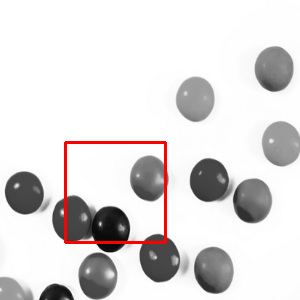

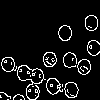

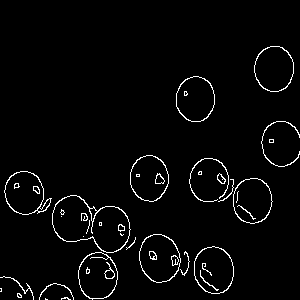

Chamfer matching completed. Best match top-left: (65, 142)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pathlib


DATA_DIR = pathlib.Path("cv_tracking_data")
DATA_DIR.mkdir(exist_ok=True)


!wget -q -O {DATA_DIR}/template.png https://raw.githubusercontent.com/opencv/opencv/master/samples/data/smarties.png
!wget -q -O {DATA_DIR}/scene.png https://raw.githubusercontent.com/opencv/opencv/master/samples/data/smarties.png

template = cv2.imread(str(DATA_DIR/'template.png'), cv2.IMREAD_GRAYSCALE)
scene = cv2.imread(str(DATA_DIR/'scene.png'), cv2.IMREAD_GRAYSCALE)


template = cv2.resize(template, (100,100))
scene = cv2.resize(scene, (300,300))

template_edges = cv2.Canny(template, 50, 150)
scene_edges = cv2.Canny(scene, 50, 150)

dist_transform = cv2.distanceTransform(255 - scene_edges, cv2.DIST_L2, 3)

h, w = template_edges.shape
scene_h, scene_w = scene_edges.shape
scores = np.zeros((scene_h - h, scene_w - w))

for y in range(scene_h - h):
    for x in range(scene_w - w):
        patch = dist_transform[y:y+h, x:x+w]
        score = np.sum(patch[template_edges > 0])
        scores[y,x] = score

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(scores)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

scene_color = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
cv2.rectangle(scene_color, top_left, bottom_right, (0,0,255), 2)

cv2_imshow(scene_color)
cv2_imshow(template_edges)
cv2_imshow(scene_edges)
print("Chamfer matching completed. Best match top-left:", top_left)